# Explore Data

Project : Predicting Monthly Electricity Consumption 

In [2]:
# import the library
import sys
import feather
from pathlib import Path
sys.path.append(r'C:\Users\Benny\fastai\old')

%config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.imports import *
from fastai.structured import *
from fastai.io import *
from fastai.dataset import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import (classification_report, confusion_matrix,
accuracy_score, log_loss, mean_squared_error, mean_absolute_error, r2_score)
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import TimeSeriesSplit, KFold

from IPython.display import display
import matplotlib.dates as mdates
import seaborn as sns

In [3]:
cleanfolder = 'E:/Users/Fern/energy_data/clean/'
mfolder = 'E:/Users/Fern/energy_data/'

In [43]:
combine = pd.read_csv(cleanfolder+'combine.csv').dropna()
combine['Year-Month'] = pd.to_datetime(combine['Year-Month'])
combine = combine.set_index('Year-Month')
# set State and Regions columns as category 
combine['State'] = combine['State'].astype('category')
combine['Regions'] = combine['Regions'].astype('category')

In [44]:
combine.columns

Index(['Year', 'Month', 'State', 'Sale_RES', 'Sale_COM', 'Sale_IND',
       'Sale_OTH', 'Sale_ALL', 'Price_RES', 'Price_COM', 'Price_IND',
       'Price_OTH', 'Price_ALL', 'Rev_RES', 'Rev_COM', 'Rev_IND', 'Rev_OTH',
       'Rev_ALL', 'Cus_RES', 'Cus_COM', 'Cus_IND', 'Cus_OTH', 'Cus_ALL',
       'Heating_deg_days', 'Cooling_deg_days', 'Pop', 'Income', 'UR', 'GSP',
       'CPI', 'Regions', 'Sale_ALL_no_OTH'],
      dtype='object')

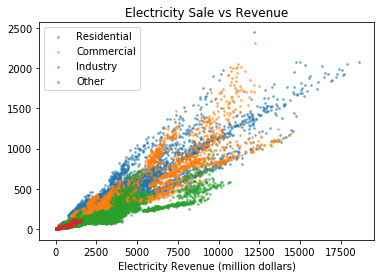

In [39]:
sale_cols = ['Sale_RES', 'Sale_COM', 'Sale_IND','Sale_OTH']
rev_cols = ['Rev_RES', 'Rev_COM', 'Rev_IND', 'Rev_OTH']

for sale_col, rev_col in zip(sale_cols,rev_cols):
    plt.scatter(x=raw[sale_col],y=raw[rev_col],label=sale_col[-4:],alpha=0.5,s=3)

plt.title('Electricity Sale vs Revenue')
plt.xlabel('Electricity Sale (million kilowatthours)')
plt.xlabel('Electricity Revenue (million dollars)')
plt.legend(['Residential','Commercial','Industry','Other'])


Since revenue follow a linear relationship with consumption with slope as retail price. Being able to predict the consumption also means predicting the revenue.  

In [40]:
# drop revenue columns from the feature 
raw = raw.drop(rev_cols,axis=1)

In [41]:
# distribution among each sector
percent = raw[sale_cols].sum(axis=0)
percent = percent/percent.sum()

Text(0.5, 1.0, 'Electricity Consumption in Each Sector')

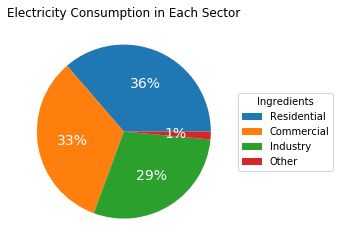

In [42]:
plt.pie(percent,autopct= '%.0f%%', textprops=dict(size='14',color="w"))
plt.legend( ['Residential','Commercial','Industry','Other'],
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Electricity Consumption in Each Sector')